<a href="https://colab.research.google.com/github/sns-sakib/polynomial-regression-using-neural-network/blob/main/keras_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [17]:
input1 = keras.layers.Input(shape=(28, 28, 1),name="input_1")

input2 = keras.layers.Input(shape=(28, 28, 1),name="input_2")

convx = keras.layers.Conv2D(32, 3, activation="relu", name="conv_x")(input1)
relux = keras.layers.ReLU( name='relu_x')(convx)
convy = keras.layers.Conv2D(32, 3, activation="relu", name="conv_y")(input2)
reluy = keras.layers.ReLU( name='relu_y')(convy)
add = keras.layers.concatenate([convx, convy], name='add')

conv2d = keras.layers.Conv2D(28, 3, activation="relu", name="conv_z")(add)
reluz = keras.layers.ReLU( name='relu_z')(conv2d)


model = keras.Model(inputs = [input1, input2], outputs = reluz, name="myModel")
model.summary()




Model: "myModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv_x (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv_y (Conv2D)                (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                            

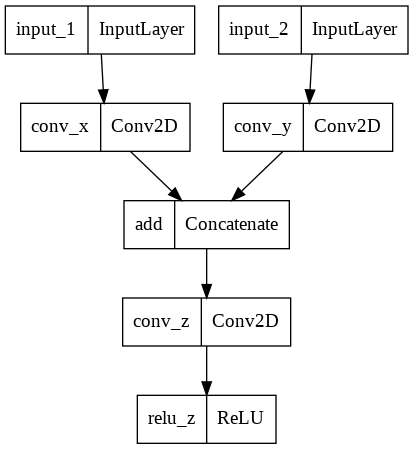

In [14]:
keras.utils.plot_model(model, "multi_input_model.png", show_shapes=False)


In [29]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss="binary_crossentropy",
   
)


In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
# Dummy input data
num_words = 1000
input1_data = np.random.randint(num_words, size=(1280, 28, 28, 1))
input2_data = np.random.randint(num_words, size=(1280, 28, 28, 1))

# Dummy target data
targets = np.random.randint(num_words, size=((1280, 24, 24, 28)))


In [41]:
len(input1_data)

1280

In [32]:

model.fit(
    {"input_1": input1_data, "input_2": input2_data},
    targets,
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 3s 71ms/step - loss: -5707.9795
Epoch 2/2
40/40 [==============================] - 3s 70ms/step - loss: -6508.7227


In [52]:
import matplotlib.pyplot as plt
test = np.random.randint(num_words, size=(1, 28, 28, 1))
test2 = np.random.randint(num_words, size=(1, 28, 28, 1))
print(model.predict([test, test2]))

[[[[285.79507  198.1042   159.29935  ... 216.16846  251.06097
    378.23398 ]
   [291.87497  223.4031   213.6584   ... 222.84569  304.37323
    311.2363  ]
   [239.16435  250.2637   228.4117   ... 161.39497  222.51428
    303.56998 ]
   ...
   [118.268    141.04488  181.39682  ... 283.03726  232.42065
    273.67456 ]
   [201.91513  152.75652  102.13447  ... 117.760506 193.03185
    282.21503 ]
   [185.18045  219.95033  228.87363  ... 154.0613   369.58066
    194.32062 ]]

  [[223.43495  185.6767   284.6804   ... 166.59584  199.35435
    296.51257 ]
   [337.07883  176.38745  167.55618  ... 241.03093  276.96695
    310.56165 ]
   [273.87817  186.20006  132.50203  ... 178.50931  120.75019
    289.2625  ]
   ...
   [283.5758   187.78043  131.80975  ... 193.99748  182.40636
    256.7955  ]
   [189.06279  232.22887  221.83359  ... 262.82123  230.28717
    232.40616 ]
   [228.25804  259.6345   170.50215  ... 131.78937  269.8112
    291.07028 ]]

  [[207.61044  253.33495  248.37471  ... 225.15